In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("modified_h3_summary_2.csv")

# 스타일 설정
sns.set(style="whitegrid")

# case 컬럼을 범주형으로 정렬
case_order = [0, 1, 2, 3]
df['case'] = pd.Categorical(df['case'], categories=case_order, ordered=True)

In [2]:
df

,trial,work,hot_compaction,cold_compaction,time(s),hot_column_key,default_column_key,rocksdb.bytes.written,rocksdb.flush.write.bytes,rocksdb.block.cache.hit,...,rocksdb.number.keys.read,rocksdb.wal.bytes,rocksdb.write.wal,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.compaction.key.drop.new.1,rocksdb.bytes.read,WAF,RAF,case
0,3,read,universal,universal,205.176,0,0,0,0,1321139,...,1000000,0,0,0,1000000,0,10347282432,0.000000,10347.282432,1
1,3,read,level,universal,325.054,0,0,0,0,729748,...,1000000,0,0,0,1000000,0,10342875136,0.000000,10342.875136,2
2,1,write,universal,level,376.560,88674,543638,16407028307,812032160,6267022,...,1911326,16407028307,1000000,3751,1907575,198808,10359799808,0.233892,5420.216022,3
3,1,write,universal,universal,369.122,88723,543583,16407028576,811904197,3557411,...,1911277,16407028576,1000000,3737,1907540,221224,10359701504,0.154844,5420.303548,1
4,1,read,universal,level,221.967,0,0,0,0,1152497,...,1000000,0,0,0,1000000,363,10339631104,0.000000,10339.631104,3
5,1,read,universal,universal,272.256,0,0,0,0,1301229,...,1000000,0,0,0,1000000,0,10329849856,0.000000,10329.849856,1
6,2,read,level,level,338.783,0,0,0,0,1274655,...,1000000,0,0,0,1000000,0,10336485376,0.000000,10336.485376,0
7,3,write,level,universal,328.092,89166,543019,16407028915,812017703,7738345,...,1910834,16407028915,1000000,3732,1907102,276887,10357719040,0.157905,5420.522683,2
8,1,write,level,level,89.410,88655,543998,16407028810,812049935,3797924,...,1911345,16407028810,1000000,3746,1907599,225627,10365386752,0.228267,5423.085185,0
9,2,read,level,universal,236.639,0,0,0,0,1334103,...,1000000,0,0,0,1000000,0,10349887488,0.000000,10349.887488,2


In [6]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

## WRITE

/tmp/ipykernel_57240/3283163074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


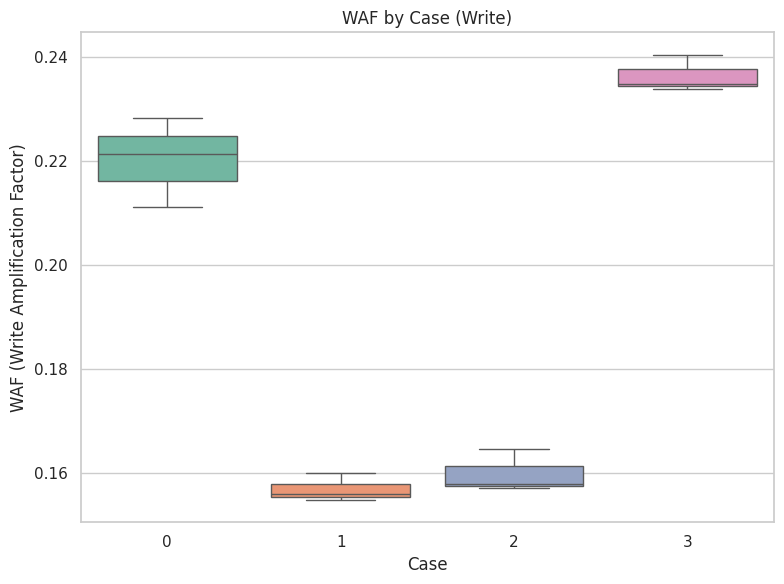

In [12]:
# 2. Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()


In [38]:
df.groupby('case')['WAF'].describe()

/tmp/ipykernel_9927/1438787012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['WAF'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,0.488568,0.009786,0.478630,0.483754,0.488878,0.493536,0.498195
1,3.0,0.281769,0.003993,0.279132,0.279472,0.279812,0.283088,0.286363
2,3.0,0.293097,0.009858,0.285525,0.287524,0.289522,0.296883,0.304243
3,3.0,0.468447,0.029716,0.435895,0.455610,0.475324,0.484723,0.494122


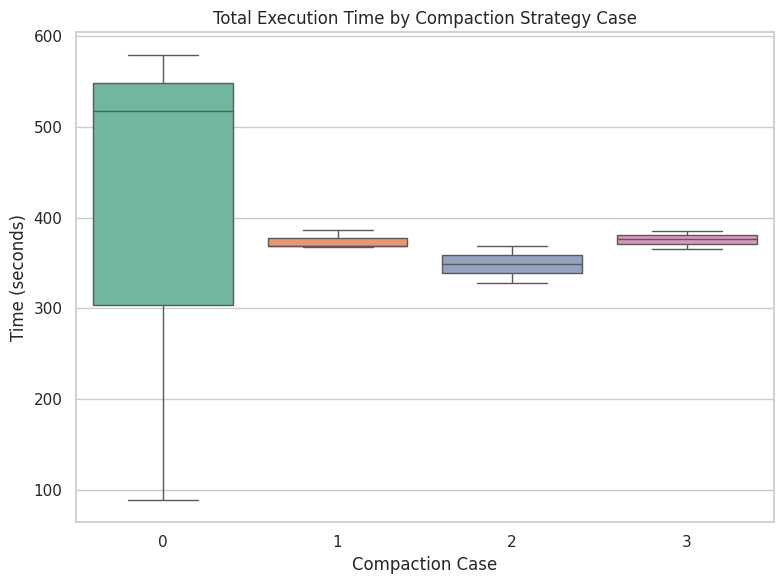

In [14]:
# 총 소요시간 by Case
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_57240/747483114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_write['cache_hit_ratio'] = df_write['rocksdb.block.cache.hit'] / (


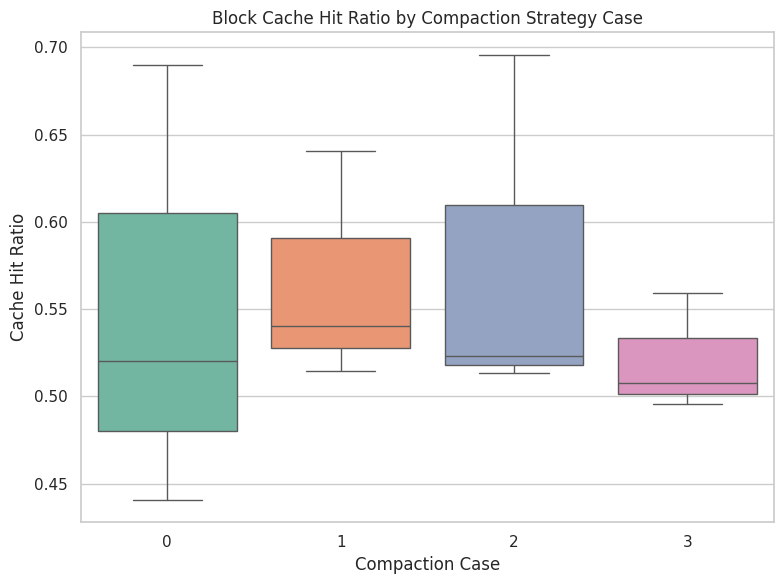

In [16]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
df_write['cache_hit_ratio'] = df_write['rocksdb.block.cache.hit'] / (
    df_write['rocksdb.block.cache.hit'] + df_write['rocksdb.block.cache.miss']
)

plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

## READ

/tmp/ipykernel_57240/2636429111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


Text(0, 0.5, 'RAF (Read Amplification Factor)')

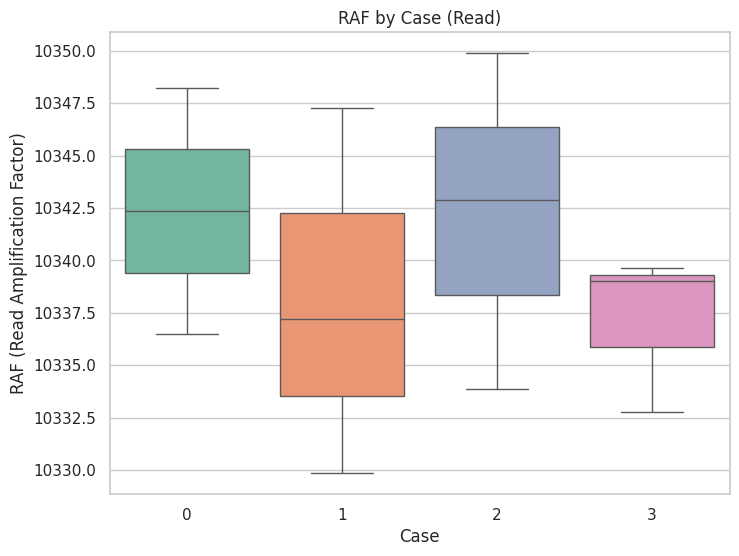

In [7]:
# 1. Read 작업의 RAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

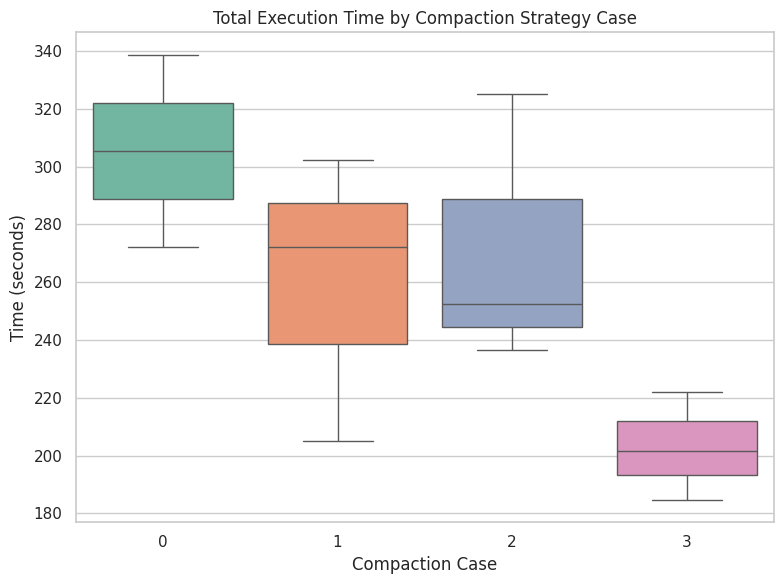

In [ ]:
# 총 소요시간 by Case
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [28]:
df.groupby('case')['time(s)'].describe()

/tmp/ipykernel_9927/2609622027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('case')['time(s)'].describe()


,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
0,3.0,322.921333,67.250168,267.389,285.5345,303.680,350.6875,397.695
1,3.0,221.652667,28.554824,196.579,206.1125,215.646,234.1895,252.733
2,3.0,321.436000,99.383120,254.691,264.3275,273.964,354.8085,435.653
3,3.0,284.551667,66.392133,209.257,259.4840,309.711,322.1990,334.687


/tmp/ipykernel_57240/2114742093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_read['cache_hit_ratio'] = df_read['rocksdb.block.cache.hit'] / (


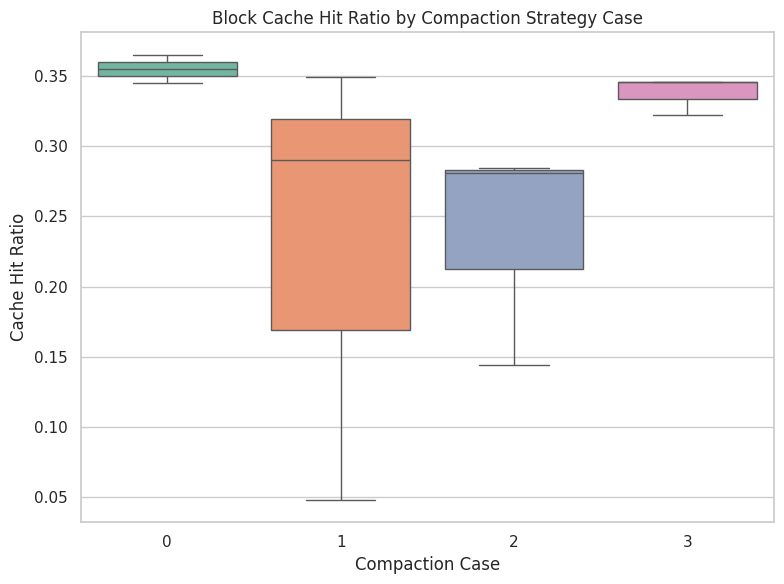

In [15]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
df_read['cache_hit_ratio'] = df_read['rocksdb.block.cache.hit'] / (
    df_read['rocksdb.block.cache.hit'] + df_read['rocksdb.block.cache.miss']
)

plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()